In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np

# Load the fashion_mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check the shape of our fashion articles
print("Training set shape:", train_images.shape)
print("Number of training labels:", len(train_labels))
print("Test set shape:", test_images.shape)
print("Number of test labels:", len(test_labels))


4422102/4422102 [==============================] - 0s 0us/step
Training set shape: (60000, 28, 28)
Number of training labels: 60000
Test set shape: (10000, 28, 28)
Number of test labels: 10000


In [5]:
def fashion_mnist_model_v1(epochs=10, batch_size=64):
    # Define the model
    model = Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # Evaluate the model on the test dataset
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'\nTest accuracy for v1: {test_acc*100:.2f}%')

    return history


Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.5431 - accuracy: 0.8124 - val_loss: 0.4369 - val_accuracy: 0.8450
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3984 - accuracy: 0.8595 - val_loss: 0.4457 - val_accuracy: 0.8327
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3591 - accuracy: 0.8721 - val_loss: 0.3693 - val_accuracy: 0.8694
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3343 - accuracy: 0.8784 - val_loss: 0.3520 - val_accuracy: 0.8717
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3139 - accuracy: 0.8847 - val_loss: 0.3574 - val_accuracy: 0.8754
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2997 - accuracy: 0.8900 - val_loss: 0.3336 - val_accuracy: 0.8799
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2806 - accuracy: 0.8970 - val_loss: 0.3338 - val_accuracy: 0.8840
Epoch 

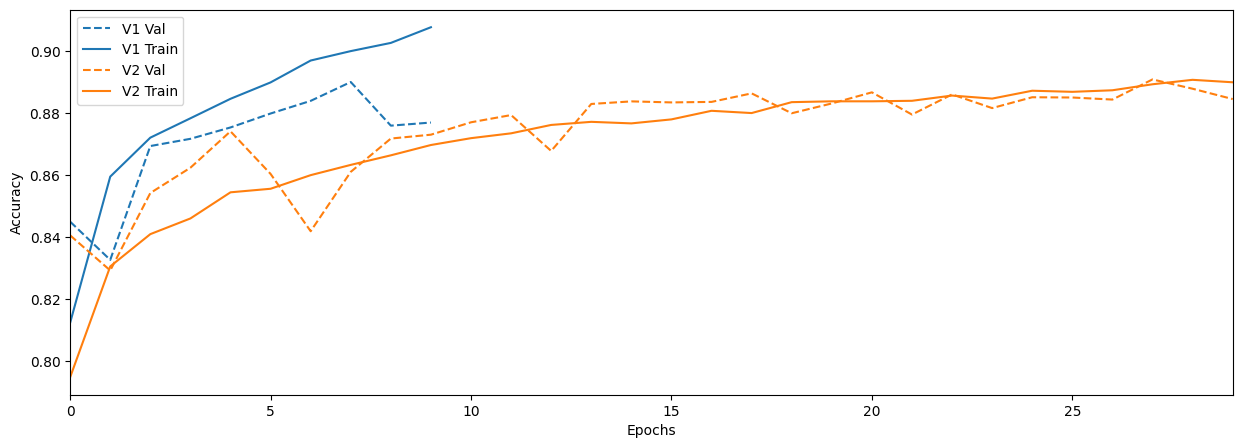

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Improved version definition of the model with more layers and neurons
def fashion_mnist_model_v2(epochs=30, batch_size=32, learning_rate=1e-3):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),  # Increased dropout
        Dense(256, activation='relu'),  # Increased number of neurons
        BatchNormalization(),
        Dropout(0.3),  # Increased dropout
        Dense(10, activation='softmax'),
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return history


# Function to plot the training history
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15, 5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])
    plt.show()

# Train the first version of the model and save the history
history_v1 = fashion_mnist_model_v1()

# Now, let's call the improved version and save its history as well
history_v2 = fashion_mnist_model_v2()

# Plot the histories for comparison
plot_history([('v1', history_v1), ('v2', history_v2)])